In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,0.85243,NaN,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,NaN,0.18641,-0.45300
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,NaN,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,NaN,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,NaN,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,NaN,NaN,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,NaN,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,NaN,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,NaN,0.90608,-0.01657,NaN,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	35
float64		column 2	52
float64		column 3	35
float64		column 4	52
float64		column 5	51
float64		column 6	34
float64		column 7	0
float64		column 8	34
float64		column 9	0
float64		column 10	34
float64		column 11	35
float64		column 12	52
float64		column 13	52
float64		column 14	69
float64		column 15	17
float64		column 16	17
float64		column 17	35
float64		column 18	35
float64		column 19	17
float64		column 20	52
float64		column 21	52
float64		column 22	18
float64		column 23	34
float64		column 24	34
float64		column 25	35
float64		column 26	17
float64		column 27	69
float64		column 28	17
float64		column 29	35
float64		column 30	51
float64		column 31	35
float64		column 32	51
float64		column 33	17
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,316.000000,299.0,316.000000,299.000000,300.000000,317.000000,351.000000,317.000000,351.000000,317.000000,...,316.000000,334.000000,282.000000,334.000000,316.000000,300.000000,316.000000,300.000000,334.000000,351.000000
mean,0.898734,0.0,0.653753,0.029147,0.608518,0.113208,0.550095,0.122787,0.511848,0.176318,...,0.390423,-0.070979,0.541438,-0.071899,0.398651,-0.043680,0.355955,-0.001866,0.345482,0.014480
std,0.302159,0.0,0.475877,0.420422,0.507930,0.442730,0.492654,0.512370,0.507066,0.480645,...,0.577270,0.501059,0.482680,0.545928,0.560900,0.483904,0.557608,0.501439,0.519585,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.497812,-0.056570,0.435122,-0.024940,0.211310,-0.044070,0.087110,-0.039230,...,0.000000,-0.295722,0.295075,-0.449138,0.000000,-0.237620,0.000000,-0.226120,0.000000,-0.165350
50%,1.000000,0.0,0.870400,0.008920,0.804740,0.024770,0.728730,0.015460,0.684210,0.023040,...,0.509360,-0.014915,0.653330,-0.019715,0.518990,0.000000,0.440555,0.000000,0.405180,0.000000
75%,1.000000,0.0,1.000000,0.160025,1.000000,0.293080,0.969240,0.367900,0.953240,0.494710,...,0.909400,0.157922,0.963700,0.144392,0.902580,0.119023,0.846467,0.189658,0.806693,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

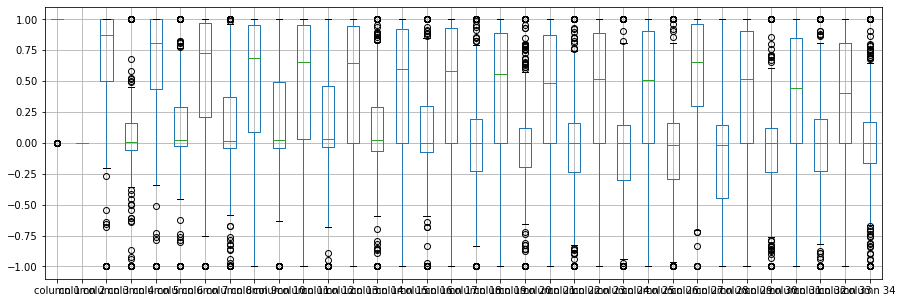

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.898734
column 2     0.000000
column 3     0.653753
column 4     0.029147
column 5     0.608518
column 6     0.113208
column 7     0.550095
column 8     0.122787
column 9     0.511848
column 10    0.176318
column 11    0.472769
column 12    0.161986
column 13    0.421538
column 14    0.077365
column 15    0.348785
column 16    0.077412
column 17    0.381561
column 18   -0.004968
column 19    0.356941
column 20   -0.012351
column 21    0.327021
column 22    0.004400
column 23    0.348776
column 24   -0.050191
column 25    0.390423
column 26   -0.070979
column 27    0.541438
column 28   -0.071899
column 29    0.398651
column 30   -0.043680
column 31    0.355955
column 32   -0.001866
column 33    0.345482
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.288379,0.001425,0.167229,0.137322,0.244514,-0.027696,0.171122,-0.038218,...,-0.000493,0.194025,-0.239702,-0.053982,0.059547,0.030485,0.133127,-0.125768,0.202843,0.017917
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.288379,NaN,1.000000,0.117771,0.431698,-0.010315,0.442730,-0.020869,0.414054,0.099530,...,0.375797,-0.117403,0.047157,0.121385,0.427318,0.041514,0.171845,0.050982,0.265152,-0.046828
column 4,0.001425,NaN,0.117771,1.000000,-0.090302,-0.103025,-0.074972,0.193489,-0.288071,0.167055,...,-0.065211,-0.162113,-0.100164,-0.045135,-0.046789,0.384040,-0.141548,-0.068333,-0.167086,-0.039445
column 5,0.167229,NaN,0.431698,-0.090302,1.000000,0.117981,0.580015,-0.022691,0.430019,-0.069563,...,0.161100,-0.015826,0.183614,0.166387,0.191910,0.053902,0.378995,0.066151,0.406734,-0.074401
column 6,0.137322,NaN,-0.010315,-0.103025,0.117981,1.000000,-0.017725,0.227098,-0.183426,0.194363,...,-0.185899,0.030060,-0.165229,-0.034879,-0.018596,-0.053664,-0.022555,0.338441,-0.016280,0.226647
column 7,0.244514,NaN,0.442730,-0.074972,0.580015,-0.017725,1.000000,-0.152081,0.461889,-0.058852,...,0.316656,0.093102,0.152670,0.131136,0.306481,0.006150,0.392197,0.003993,0.554557,-0.076460
column 8,-0.027696,NaN,-0.020869,0.193489,-0.022691,0.227098,-0.152081,1.000000,-0.344106,0.324307,...,-0.141851,-0.201867,-0.256482,0.074597,-0.144359,0.074097,-0.102842,0.118806,-0.214417,0.338857
column 9,0.171122,NaN,0.414054,-0.288071,0.430019,-0.183426,0.461889,-0.344106,1.000000,-0.234989,...,0.328704,0.122185,0.208717,0.166299,0.369703,-0.004965,0.283240,-0.006984,0.347076,-0.095597
column 10,-0.038218,NaN,0.099530,0.167055,-0.069563,0.194363,-0.058852,0.324307,-0.234989,1.000000,...,-0.168166,-0.025382,-0.221250,0.112276,-0.073416,0.017741,-0.119578,0.002142,-0.185836,0.063303


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+24,34+24+24,34+24+24+24,34+24+24+24+24,34+24+24+24,34+24+24,34+24,34], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.125840368725004
Epoch: 1 , loss: 18.16611725943429
Epoch: 2 , loss: 18.127060390654066
Epoch: 3 , loss: 18.085788227262952
Epoch: 4 , loss: 17.89439769018264
Epoch: 5 , loss: 17.95661803654262
Epoch: 6 , loss: 17.84789276123047
Epoch: 7 , loss: 17.878843489147368
Epoch: 8 , loss: 17.829773448762438
Epoch: 9 , loss: 17.633924393426803
Epoch: 10 , loss: 17.740323929559615
Epoch: 11 , loss: 17.48566704704648
Epoch: 12 , loss: 17.288130306062243
Epoch: 13 , loss: 16.81321362086705
Epoch: 14 , loss: 16.16735903422038
Epoch: 15 , loss: 15.765409333365303
Epoch: 16 , loss: 15.766885257902599
Epoch: 17 , loss: 15.606955619085403
Epoch: 18 , loss: 15.498363949003673
Epoch: 19 , loss: 15.495850018092565
Epoch: 20 , loss: 15.41104843502953
Epoch: 21 , loss: 15.518659546261741
Epoch: 22 , loss: 15.40167354402088
Epoch: 23 , loss: 15.529757363455635
Epoch: 24 , loss: 15.31197148277646
Epoch: 25 , loss: 15.363320

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.100689
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11   -0.094517
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16    0.007106
column 17   -1.000000
column 18   -1.000000
column 19   -1.000000
column 20    0.003605
column 21   -0.086881
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30   -0.002100
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.000000,0.000000,0.0,0.000000,-0.002897,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.599119,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.540669,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,-0.000350,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,-0.793006,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,-0.001068,-0.495384,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
347,0.0,-0.000679,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
348,0.0,-0.000673,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
349,0.0,-0.000849,0.000000,0.0,-0.386381,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

19.398513122446328

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.28335473489297014

In [19]:
new_df.iloc[66,:]

column 1     0.566442
column 2    -0.001265
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.484764
column 12    0.332660
column 13    0.477622
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.062777
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.000000,0.995390,-0.05889,0.852430,0.020163,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.410780,-0.46168,0.21266,-0.34090,0.42267,0.054249,0.18641,-0.45300
1,1.0,0.000000,1.000000,-0.18829,0.930350,-0.361560,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,0.335989,-0.18401,-0.19040,-0.11593,-0.16626,-0.062880,-0.13738,-0.02447
2,1.0,-0.000350,1.000000,-0.03365,1.000000,0.004850,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.589840,-0.22145,0.43100,-0.17365,0.60436,-0.241800,0.56045,-0.38238
3,1.0,0.000000,1.000000,-0.45161,1.000000,1.000000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.516130,1.00000,1.00000,-0.20099,0.25682,1.000000,-0.32382,1.00000
4,1.0,0.000000,0.206994,-0.02401,0.941400,0.065310,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.132900,-0.53206,0.02431,-0.62197,-0.05707,-0.595730,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,-0.001068,0.339696,0.08298,0.737390,-0.147060,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.834790,0.00123,1.00000,0.12815,0.86660,-0.107140,0.90546,-0.04307
347,1.0,-0.000679,0.951130,0.00419,0.951830,-0.027230,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.935220,0.04925,0.93159,0.08168,0.94066,-0.000350,0.91483,0.04712
348,1.0,-0.000673,0.947010,-0.00034,0.932070,-0.032270,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.924890,0.02542,0.92120,0.02242,0.92459,0.004420,0.92697,-0.00577
349,1.0,-0.000849,0.906080,-0.01657,0.594839,-0.019890,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.891470,-0.07760,0.82983,-0.17238,0.96022,-0.037570,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NG_10(imp).xlsx", index=False, header=False)